# Calculation of the artificial heatflux out of zonal data

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

experiment1 =  "mlo_aqua_1438ppmv"
filename1 = experiment1 +"_atm_2d_ml_0137to0338.mm.zm.nc" 
data_path1 = "/work/bb1092/pp_JH/" +experiment1 +"/"

experiment2 =  "mlo_aqua_3000ppmv_Jor2"
filename2 = experiment2 +"_atm_2d_ml_0258to0425.mm.zm.nc" 
data_path2 = "/work/bb1092/pp_JH/" +experiment2 +"/"

experiment3 =  "mlo_aqua_5000ppmv_Jor2"
filename3 = experiment3 +"_atm_2d_ml_0258to0306.mm.zm.nc" 
data_path3 = "/work/bb1092/pp_JH/" +experiment3 +"/"

experiment4 =  "mlo_aqua_1500ppmv"
filename4 = experiment4 +"_atm_2d_ml.mm.zm.nc" 
data_path4 = "/work/bb1092/pp_JH/" +experiment4 +"/"



print(filename1)
print(filename2)
# load netcdf file
DS1 = xr.open_dataset(data_path1 +filename1, decode_times=False)
DS2 = xr.open_dataset(data_path2 +filename2, decode_times=False)
DS3 = xr.open_dataset(data_path3 +filename3, decode_times=False)
DS4 = xr.open_dataset(data_path4 +filename4, decode_times=False)

mlo_aqua_1438ppmv_atm_2d_ml_0137to0338.mm.zm.nc
mlo_aqua_3000ppmv_Jor2_atm_2d_ml_0258to0425.mm.zm.nc


In [22]:

def legend_color(ax, handle_array, pos, fontsize):
    legend = ax.legend(handle_array,handlelength=0, handletextpad=0, edgecolor='none', facecolor='none', markerscale=0, loc=pos, prop={'weight':'bold',
                                                                                                                                      'size': fontsize})
    for item in legend.legendHandles:
        item.set_visible(False)
    #n = 16
    #color = plt.cm.tab20(np.linspace(0, 1,n))
    
    colors = ["#1845fb", "#ff5e02", "#c91f16", "#c849a9", "#adad7d", "#86c8dd", "#578dff", "#656364"]
    for text in legend.get_texts():
        
        
        
        if text.get_text() == "1438ppmv":
            text.set_color(colors[0])
        elif text.get_text() == "1500ppmv":
            text.set_color(colors[1])
        elif text.get_text() == "3000ppmv":
            text.set_color(colors[2])
        elif text.get_text() == "5000ppmv":
            text.set_color(colors[3])
        else:
            text.set_color("white")    
        
            
    return legend

In [13]:
# qbot
da1 = DS1.qbot_icecl.sel()
da1 = da1.assign_coords(time=(da1.time/360))
da1 = da1.squeeze()

da2 = DS2.qbot_icecl.sel()
da2 = da2.assign_coords(time=(da2.time/360))
da2 = da2.squeeze()

da3 = DS3.qbot_icecl.sel()
da3 = da3.assign_coords(time=(da3.time/360))
da3 = da3.squeeze()

da4 = DS4.qbot_icecl.sel()
da4 = da4.assign_coords(time=(da4.time/360))
da4 = da4.squeeze()

qbot1=da1.values
qbot2=da2.values
qbot3=da3.values
qbot4=da4.values

mqbot1 = np.pi/2* np.dot(da1.values,np.cos(np.radians(da1.lat))) / np.size(da1.lat)
mqbot2 = np.pi/2* np.dot(da2.values,np.cos(np.radians(da2.lat))) / np.size(da2.lat)
mqbot3 = np.pi/2* np.dot(da3.values,np.cos(np.radians(da3.lat))) / np.size(da3.lat)
mqbot4 = np.pi/2* np.dot(da4.values,np.cos(np.radians(da4.lat))) / np.size(da4.lat)





In [14]:
# sea ice thickness tendency
da1 = DS1.dhidt_icecl.sel()
da1 = da1.assign_coords(time=(da1.time/360))
da1 = da1.squeeze()
dhidt1 =da1.values*60*60*24*30 # ice growth per month

da2 = DS2.dhidt_icecl.sel()
da2 = da2.assign_coords(time=(da2.time/360))
da2 = da2.squeeze()
dhidt2 =da2.values*60*60*24*30 # ice growth per month

da3 = DS3.dhidt_icecl.sel()
da3 = da3.assign_coords(time=(da3.time/360))
da3 = da3.squeeze()
dhidt3 =da3.values*60*60*24*30 # ice growth per month

da4 = DS4.dhidt_icecl.sel()
da4 = da4.assign_coords(time=(da4.time/360))
da4 = da4.squeeze()
dhidt4 =da4.values*60*60*24*30 # ice growth per month


# sea ice cover
da1 = DS1.sic.sel()
da1 = da1.assign_coords(time=(da1.time/360))
da1 = da1.squeeze()
sic1 = da1.values

da2 = DS2.sic.sel()
da2 = da2.assign_coords(time=(da2.time/360))
da2 = da2.squeeze()
sic2 = da2.values

da3 = DS3.sic.sel()
da3 = da3.assign_coords(time=(da3.time/360))
da3 = da3.squeeze()
sic3 = da3.values

da4 = DS4.sic.sel()
da4 = da4.assign_coords(time=(da4.time/360))
da4 = da4.squeeze()
sic4 = da4.values

# sea ice thickness
da1 = DS1.sit.sel()
da1 = da1.assign_coords(time=((da1.time-da1.time[0])/360))
da1 = da1.squeeze()
sit1 = da1.values

da2 = DS2.sit.sel()
da2 = da2.assign_coords(time=((da2.time-da2.time[0])/360))
da2 = da2.squeeze()
sit2 = da2.values

da3 = DS3.sit.sel()
da3 = da3.assign_coords(time=((da3.time-da3.time[0])/360))
da3 = da3.squeeze()
sit3 = da3.values

da4 = DS4.sit.sel()
da4 = da4.assign_coords(time=((da4.time-da4.time[0])/360))
da4 = da4.squeeze()
sit4 = da4.values

#temperature
da1 = DS1.ts.sel()
da1 = da1.assign_coords(time=((da1.time-da1.time[0])/360))
da1 = da1.squeeze()
ts1 = da1.values

da2 = DS2.ts.sel()
da2 = da2.assign_coords(time=((da2.time-da2.time[0])/360))
da2 = da2.squeeze()
ts2 = da2.values

da3 = DS3.ts.sel()
da3 = da3.assign_coords(time=((da3.time-da3.time[0])/360))
da3 = da3.squeeze()
ts3 = da3.values

da4 = DS4.ts.sel()
da4 = da4.assign_coords(time=((da4.time-da4.time[0])/360))
da4 = da4.squeeze()
ts4 = da4.values



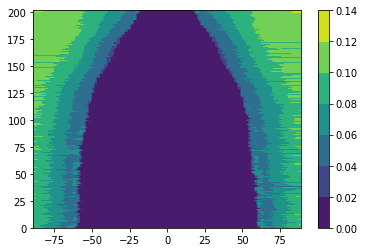

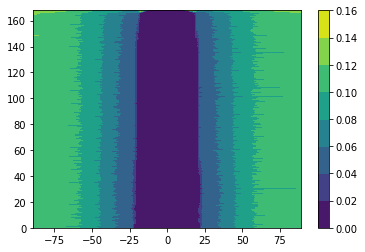

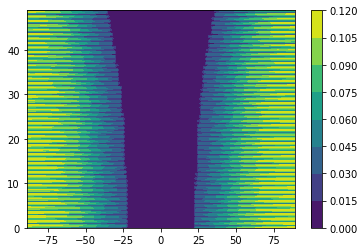

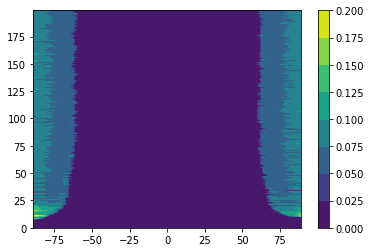

In [15]:
# points where sea ice thickness exceeds the sea ice limit
icelim1= np.where(sit1 + dhidt1>5) 
icelim2= np.where(sit2 + dhidt2>5)
icelim3= np.where(sit3 + dhidt3>5)
icelim4= np.where(sit4 + dhidt4>5)


removed_thickness1 = np.zeros([da1.sizes["time"],96])
removed_thickness2 = np.zeros([da2.sizes["time"],96])
removed_thickness3 = np.zeros([da3.sizes["time"],96])
removed_thickness4 = np.zeros([da4.sizes["time"],96])

# calculate removed sea ice thickness
removed_thickness1[icelim1] = sit1[icelim1] + dhidt1[icelim1] - 5 # per month
removed_thickness2[icelim2] = sit2[icelim2] + dhidt2[icelim2] - 5
removed_thickness3[icelim3] = sit3[icelim3] + dhidt3[icelim3] - 5
removed_thickness4[icelim4] = sit4[icelim4] + dhidt4[icelim4] - 5




fig1, ax1 = plt.subplots()
im1=ax1.contourf(da1.lat, da1.time, removed_thickness1)

fig1.colorbar(im1)
plt.show()

fig2, ax2 = plt.subplots()
im2=ax2.contourf(da2.lat, da2.time, removed_thickness2)

fig2.colorbar(im2)
plt.show()

fig3, ax3 = plt.subplots()
im3=ax3.contourf(da3.lat, da3.time, removed_thickness3)

fig3.colorbar(im3)
plt.show()

fig4, ax4 = plt.subplots()
im4=ax4.contourf(da4.lat, da4.time, removed_thickness4)

fig4.colorbar(im4)
plt.show()


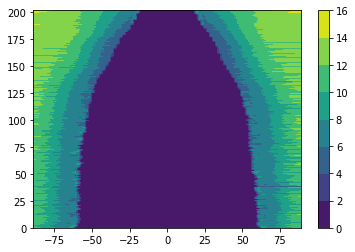

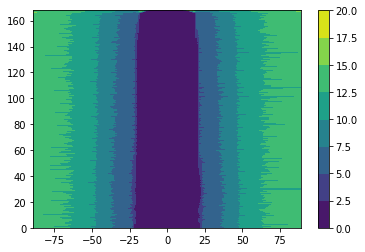

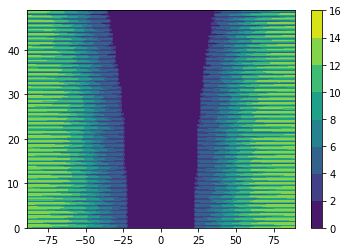

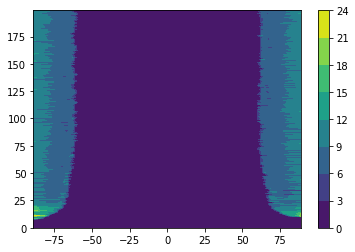

In [16]:
#physical constants from icon
alv = 2.5008e6    # [J/kg]   latent heat for vaporisation
als = 2.8345e6    # [J/kg]   latent heat for sublimation
alf = als-alv     # [J/kg]   latent heat for fusion
rhoi = 917.0      # density of sea ice         [kg / m**3]

#calculate energy flux from the freezing of removed sea ice thickness, dhidt = F/(alf*rhoi) <-> F=dhidt*alf*rhoi

energy1 = np.zeros([da1.sizes["time"],96])
energy1 = removed_thickness1 * alf * rhoi / (60 * 60 * 24 * 30) # Joule per second per m^2 -> Watt per m^2

energy2 = np.zeros([da2.sizes["time"],96])
energy2 = removed_thickness2 * alf * rhoi / (60 * 60 * 24 * 30) 

energy3 = np.zeros([da3.sizes["time"],96])
energy3 = removed_thickness3 * alf * rhoi / (60 * 60 * 24 * 30) 

energy4 = np.zeros([da4.sizes["time"],96])
energy4 = removed_thickness4 * alf * rhoi / (60 * 60 * 24 * 30) 


fig1, ax1 = plt.subplots()
im1=ax1.contourf(da1.lat, da1.time, energy1)

fig1.colorbar(im1)
plt.show()

fig2, ax2 = plt.subplots()
im2=ax2.contourf(da2.lat, da2.time, energy2)

fig2.colorbar(im2)
plt.show()

fig3, ax3 = plt.subplots()
im3=ax3.contourf(da3.lat, da3.time, energy3)

fig3.colorbar(im3)
plt.show()

fig4, ax4 = plt.subplots()
im4=ax4.contourf(da4.lat, da4.time, energy4)

fig4.colorbar(im4)
plt.show()

In [17]:
#global mean flux 
msit1 = np.pi/2* np.dot(sit1,np.cos(np.radians(da1.lat))) / np.size(da1.lat)
msit2 = np.pi/2* np.dot(sit2,np.cos(np.radians(da2.lat))) / np.size(da2.lat)
msit3 = np.pi/2* np.dot(sit3,np.cos(np.radians(da3.lat))) / np.size(da3.lat)
msit4 = np.pi/2* np.dot(sit4,np.cos(np.radians(da4.lat))) / np.size(da4.lat)

msic1 = np.pi/2* np.dot(sic1,np.cos(np.radians(da1.lat))) / np.size(da1.lat)
msic2 = np.pi/2* np.dot(sic2,np.cos(np.radians(da2.lat))) / np.size(da2.lat)
msic3 = np.pi/2* np.dot(sic3,np.cos(np.radians(da3.lat))) / np.size(da3.lat)
msic4 = np.pi/2* np.dot(sic4,np.cos(np.radians(da4.lat))) / np.size(da4.lat)

mts1 = np.pi/2* np.dot(ts1,np.cos(np.radians(da1.lat))) / np.size(da1.lat)
mts2 = np.pi/2* np.dot(ts2,np.cos(np.radians(da2.lat))) / np.size(da2.lat)
mts3 = np.pi/2* np.dot(ts3,np.cos(np.radians(da3.lat))) / np.size(da3.lat)
mts4 = np.pi/2* np.dot(ts4,np.cos(np.radians(da4.lat))) / np.size(da4.lat)



#energy1 * np.cos(np.radians(da1.lat))
menergy1= np.pi/2* np.dot(energy1,np.cos(np.radians(da1.lat))) / np.size(da1.lat)
menergy2= np.pi/2* np.dot(energy2,np.cos(np.radians(da2.lat))) / np.size(da2.lat)
menergy3= np.pi/2* np.dot(energy3,np.cos(np.radians(da3.lat))) / np.size(da3.lat)
menergy4= np.pi/2* np.dot(energy4,np.cos(np.radians(da4.lat))) / np.size(da4.lat)

ymenergy1=np.zeros(int(menergy1.shape[0]/12))
ymenergy2=np.zeros(int(menergy2.shape[0]/12))
ymenergy3=np.zeros(int(menergy3.shape[0]/12))
ymenergy4=np.zeros(int(menergy4.shape[0]/12))

ymsic1=np.zeros(int(msic1.shape[0]/12))
ymsic2=np.zeros(int(msic2.shape[0]/12))
ymsic3=np.zeros(int(msic3.shape[0]/12))
ymsic4=np.zeros(int(msic4.shape[0]/12))

for y in range(0,int(menergy1.shape[0]/12)):
    ymenergy1[y] = np.mean(menergy1[(y*12):(y*12)+11])
    ymsic1[y] = np.mean(msic1[(y*12):(y*12)+11])
    
for y in range(0,int(menergy2.shape[0]/12)):
    ymenergy2[y] = np.mean(menergy2[(y*12):(y*12)+11])
    ymsic2[y] = np.mean(msic2[(y*12):(y*12)+11])
    
for y in range(0,int(menergy3.shape[0]/12)):
    ymenergy3[y] = np.mean(menergy3[(y*12):(y*12)+11])
    ymsic3[y] = np.mean(msic3[(y*12):(y*12)+11])
    
for y in range(0,int(menergy4.shape[0]/12)):
    ymenergy4[y] = np.mean(menergy4[(y*12):(y*12)+11])
    ymsic4[y] = np.mean(msic4[(y*12):(y*12)+11])




# sea ice latitude
ice_lat1 = np.arcsin(1-msic1) * (180./np.pi) 
ice_lat2 = np.arcsin(1-msic2) * (180./np.pi) 
ice_lat3 = np.arcsin(1-msic3) * (180./np.pi) 
ice_lat4 = np.arcsin(1-msic4) * (180./np.pi) 

yice_lat1=np.zeros(int(ice_lat1.shape[0]/12))
yice_lat2=np.zeros(int(ice_lat2.shape[0]/12))
yice_lat3=np.zeros(int(ice_lat3.shape[0]/12))
yice_lat4=np.zeros(int(ice_lat4.shape[0]/12))

menergy1m=np.zeros(int(ice_lat1.shape[0]/12))
msit1m=np.zeros(int(ice_lat1.shape[0]/12))

for y in range(0,int(ice_lat1.shape[0]/12)):
    yice_lat1[y] = np.mean(ice_lat1[(y*12):(y*12)+11])
    menergy1m[y] = np.mean(menergy1[(y*12):(y*12)+11])
    msit1m[y] = np.mean(msit1[(y*12):(y*12)+11])
    
for y in range(0,int(ice_lat2.shape[0]/12)):
    yice_lat2[y] = np.mean(ice_lat2[(y*12):(y*12)+11])
    
for y in range(0,int(ice_lat3.shape[0]/12)):
    yice_lat3[y] = np.mean(ice_lat3[(y*12):(y*12)+11])
    
for y in range(0,int(ice_lat4.shape[0]/12)):
    yice_lat4[y] = np.mean(ice_lat4[(y*12):(y*12)+11])


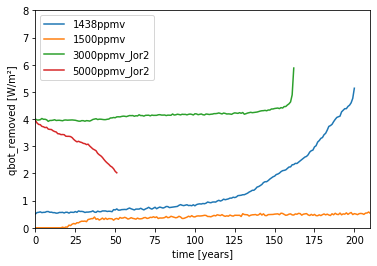

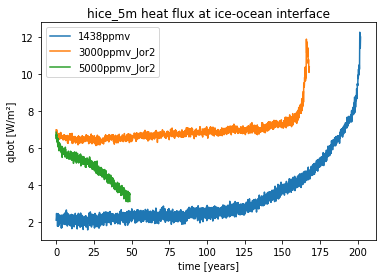

5.877783718381085
-0.002561321


In [18]:


#plt.plot(da1.time,menergy1)
#plt.plot(da2.time,menergy2)
#plt.plot(da3.time,menergy3)
plt.plot(ymenergy1)
plt.plot(ymenergy4)
plt.plot(ymenergy2)
plt.plot(ymenergy3)
plt.legend(["1438ppmv","1500ppmv","3000ppmv_Jor2","5000ppmv_Jor2"],loc = 2)
#plt.title("hice_5m: heat flux from removed ice")
plt.title("")
plt.xlabel("time [years]")
plt.ylabel("qbot_removed [W/m²]")
plt.xlim(0,210)
plt.ylim(0,8)
plt.savefig("plots/heatflux_comparison.svg",dpi=500)
plt.show()



plt.plot(da1.time,-mqbot1)
plt.plot(da2.time,-mqbot2)
plt.plot(da3.time,-mqbot3)
plt.legend(["1438ppmv","3000ppmv_Jor2","5000ppmv_Jor2"],loc = 2)
plt.title("hice_5m heat flux at ice-ocean interface")
plt.xlabel("time [years]")
plt.ylabel("qbot [W/m²]")
plt.show()

print(ymenergy2[-1])
print(ice_lat2[-1])

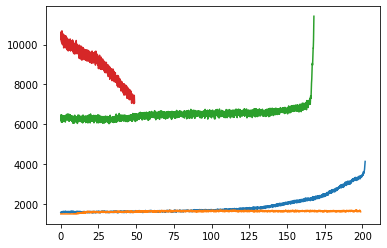

In [19]:
# co2 equivalent of artifical heat flux
alpha = 5.35
mco21 = 1438 * np.exp(menergy1/alpha)
mco22 = 3000 * np.exp(menergy2/alpha)
mco23 = 5000 * np.exp(menergy3/alpha)
mco24 = 1500 * np.exp(menergy4/alpha)

mco21r =  np.exp(menergy1/alpha)
mco22r =  np.exp(menergy2/alpha)
mco23r =  np.exp(menergy3/alpha)
mco24r =  np.exp(menergy4/alpha)

plt.plot(da1.time,mco21)
plt.plot(da4.time,mco24)
plt.plot(da2.time,mco22)
plt.plot(da3.time,mco23)


(630,)
(630, 96)
(630,)
0.9916648749327626
0.9420278794069241
0.9797683783641139
(0.0, 1.0)


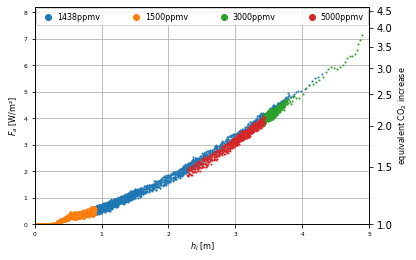

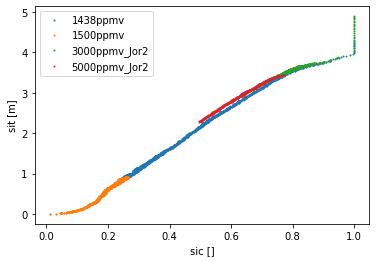

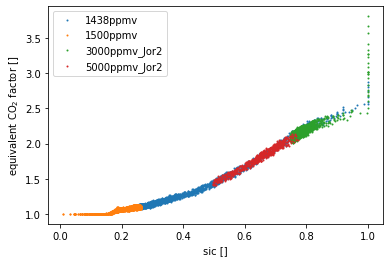

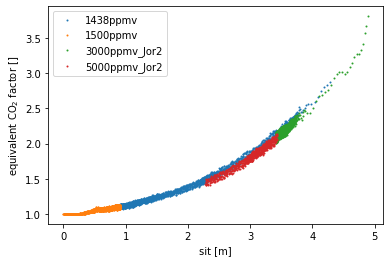

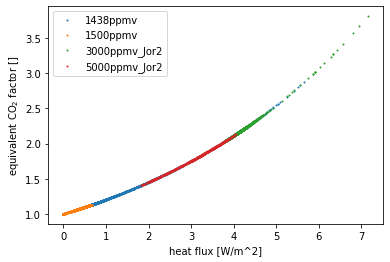

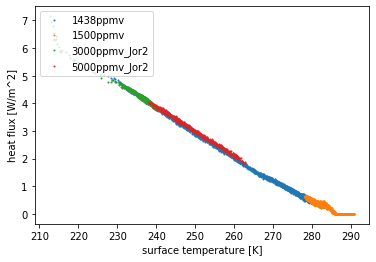

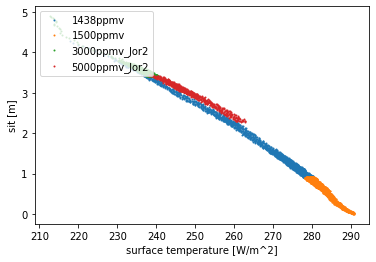

In [20]:

pltsize=2
labelsize=8
ticksize=6




print(msit3.shape)
print(sit3.shape)
print(menergy3.shape)

print(np.corrcoef(msit1,menergy1)[1,0])
print(np.corrcoef(msit2,menergy2)[1,0])
print(np.corrcoef(msit3,menergy3)[1,0])

# far - sit
fig, ax = plt.subplots()
plt.plot(msit1, menergy1,'.',markersize=pltsize)
plt.plot(msit4, menergy4,'.',markersize=pltsize)
plt.plot(msit2, menergy2,'.',markersize=pltsize)
plt.plot(msit3, menergy3,'.',markersize=pltsize)
plt.grid()
plt.xlim(0,5)

ylim=plt.ylim(0,8.2)
plt.xlabel("$h_I$ [m]", fontsize=labelsize)
plt.ylabel("$F_{a}$ [W/m²]", fontsize=labelsize)
plt.legend(["1438ppmv","1500ppmv","3000ppmv","5000ppmv"],loc = 2, 
               ncol=4, labelspacing=0.2,columnspacing=2,handletextpad=0.1,  handlelength=2, mode="expand",
           borderpad=0.5,borderaxespad=0.2,markerscale=6, fontsize=labelsize)


ax2 = ax.twinx()
co2_fac=np.linspace(1,5,9)
print(plt.ylim())

np.exp(menergy1/alpha)

ax2.set_yticks(np.log(co2_fac)*alpha)
ax2.set_ylim(0,8.2)
_=ax2.set_yticklabels(co2_fac)
plt.ylabel("equivalent CO$_2$ increase", fontsize=labelsize)
ax.tick_params(labelsize=ticksize) 

plt.savefig("plots/heatflux_scatter_flux_sit.svg",dpi=500)
plt.show()





plt.show()  

plt.plot(msic1, msit1,'.',markersize=pltsize)
plt.plot(msic4, msit4,'.',markersize=pltsize)
plt.plot(msic2, msit2,'.',markersize=pltsize)
plt.plot(msic3, msit3,'.',markersize=pltsize)

plt.xlabel("sic []")
plt.ylabel("sit [m]")
plt.legend(["1438ppmv","1500ppmv","3000ppmv_Jor2","5000ppmv_Jor2"],loc = 2)
plt.show()

plt.plot(msic1, mco21r,'.',markersize=pltsize)
plt.plot(msic4, mco24r,'.',markersize=pltsize)
plt.plot(msic2, mco22r,'.',markersize=pltsize)
plt.plot(msic3, mco23r,'.',markersize=pltsize)
plt.xlabel("sic []")
plt.ylabel("equivalent CO$_2$ factor []")
#plt.ylim(1,3.1)
plt.legend(["1438ppmv","1500ppmv","3000ppmv_Jor2","5000ppmv_Jor2"],loc = 2)
plt.show()

plt.plot(msit1, mco21r,'.',markersize=pltsize)
plt.plot(msit4, mco24r,'.',markersize=pltsize)
plt.plot(msit2, mco22r,'.',markersize=pltsize)
plt.plot(msit3, mco23r,'.',markersize=pltsize)
plt.xlabel("sit [m]")
plt.ylabel("equivalent CO$_2$ factor []")
plt.legend(["1438ppmv","1500ppmv","3000ppmv_Jor2","5000ppmv_Jor2"],loc = 2)
plt.show()

plt.plot(menergy1, mco21r,'.',markersize=pltsize)
plt.plot(menergy4, mco24r,'.',markersize=pltsize)
plt.plot(menergy2, mco22r,'.',markersize=pltsize)
plt.plot(menergy3, mco23r,'.',markersize=pltsize)
plt.xlabel("heat flux [W/m^2]")
plt.ylabel("equivalent CO$_2$ factor []")
plt.legend(["1438ppmv","1500ppmv","3000ppmv_Jor2","5000ppmv_Jor2"],loc = 2)
plt.show()

plt.plot(mts1, menergy1,'.',markersize=pltsize)
plt.plot(mts4, menergy4,'.',markersize=pltsize)
plt.plot(mts2, menergy2,'.',markersize=pltsize)
plt.plot(mts3, menergy3,'.',markersize=pltsize)
plt.ylabel("heat flux [W/m^2]")
plt.xlabel("surface temperature [K]")
plt.legend(["1438ppmv","1500ppmv","3000ppmv_Jor2","5000ppmv_Jor2"],loc = 2)
plt.show()

plt.plot(mts1, msit1,'.',markersize=pltsize)
plt.plot(mts4, msit4,'.',markersize=pltsize)
plt.plot(mts2, msit2,'.',markersize=pltsize)
plt.plot(mts3, msit3,'.',markersize=pltsize)
plt.xlabel("surface temperature [W/m^2]")
plt.ylabel("sit [m]")
plt.legend(["1438ppmv","1500ppmv","3000ppmv_Jor2","5000ppmv_Jor2"],loc = 2)
plt.show()

0.9938529939485001
0.8676139722084588
0.9821811371639458
(0.0, 1.0)


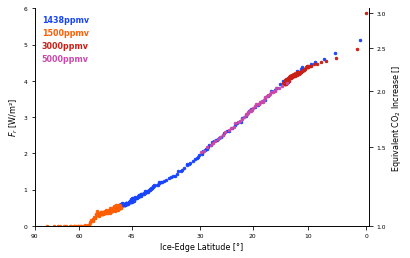

In [26]:
# far - icelat
ylim=(0,6)
labelsize=8
ticksize=6

# same colors as in overview plots
#n = 16
#color = plt.cm.tab20(np.linspace(0, 1,n))
    
    
colors = ["#1845fb", "#ff5e02", "#c91f16", "#c849a9", "#adad7d", "#86c8dd", "#578dff", "#656364"]   
fig, ax = plt.subplots(figsize=(6,4))
print(np.corrcoef(msic1,menergy1)[1,0])
print(np.corrcoef(msic2,menergy2)[1,0])
print(np.corrcoef(msic3,menergy3)[1,0])
plt.scatter(ymsic1, ymenergy1,marker='o',s=6,color=colors[0])
plt.scatter(ymsic4, ymenergy4,marker='o',s=6,color=colors[1])
plt.scatter(ymsic2, ymenergy2,marker='o',s=6,color=colors[2])
plt.scatter(ymsic3, ymenergy3,marker='o',s=6,color=colors[3])

ax.set_xticks([1-np.sin(np.radians(0)),1-np.sin(np.radians(10)),1-np.sin(np.radians(20)),1-np.sin(np.radians(30)),1-np.sin(np.radians(45)),1-np.sin(np.radians(60)),1-np.sin(np.radians(90))])
ax.set_xticklabels([0,10,20,30,45,60,90])

plt.xlim(0,1.01)

plt.ylim(ylim)
plt.xlabel("Ice-Edge Latitude [°]", fontsize=labelsize)
plt.ylabel("$F_{r}$ [W/m²]", fontsize=labelsize)
#plt.legend(["1438ppmv","1500ppmv","3000ppmv","5000ppmv"],loc = 2, 
#               ncol=4, labelspacing=0.2,columnspacing=2,handletextpad=0.1,  handlelength=2, mode="expand",
#           borderpad=0.5,borderaxespad=0.2,markerscale=2)
legend_color(ax,["1438ppmv","1500ppmv","3000ppmv","5000ppmv"],2, labelsize)

ax2 = ax.twinx()
co2_fac=np.linspace(1,5,9)
print(plt.ylim())

np.exp(menergy1/alpha)

ax2.set_yticks(np.log(co2_fac)*alpha)
ax2.set_ylim(ylim)
_=ax2.set_yticklabels(co2_fac)
plt.ylabel("Equivalent CO$_2$ Increase []", fontsize=labelsize)

ax.tick_params(labelsize=ticksize)
ax2.tick_params(labelsize=ticksize)

#ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax2.spines['top'].set_color('none')

plt.savefig("plots/heatflux_scatter_flux_icelat_rev1.pdf")

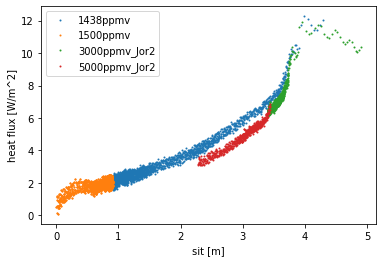

0.9773656235942157
0.9704530181574433
0.9820133574839562


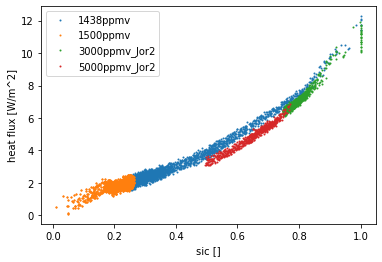

In [17]:
plt.plot(msit1, -mqbot1,'.',markersize=pltsize)
plt.plot(msit4, -mqbot4,'.',markersize=pltsize)
plt.plot(msit2, -mqbot2,'.',markersize=pltsize)
plt.plot(msit3, -mqbot3,'.',markersize=pltsize)
plt.xlabel("sit [m]")
plt.ylabel("heat flux [W/m^2]")
plt.legend(["1438ppmv","1500ppmv","3000ppmv_Jor2","5000ppmv_Jor2"],loc = 2)
plt.show()

print(np.corrcoef(msic1,-mqbot1)[1,0])
print(np.corrcoef(msic2,-mqbot2)[1,0])
print(np.corrcoef(msic3,-mqbot3)[1,0])
plt.plot(msic1, -mqbot1,'.',markersize=pltsize)
plt.plot(msic4, -mqbot4,'.',markersize=pltsize)
plt.plot(msic2, -mqbot2,'.',markersize=pltsize)
plt.plot(msic3, -mqbot3,'.',markersize=pltsize)
plt.xlabel("sic []")
plt.ylabel("heat flux [W/m^2]")
plt.legend(["1438ppmv","1500ppmv","3000ppmv_Jor2","5000ppmv_Jor2"],loc = 2)
plt.show()  


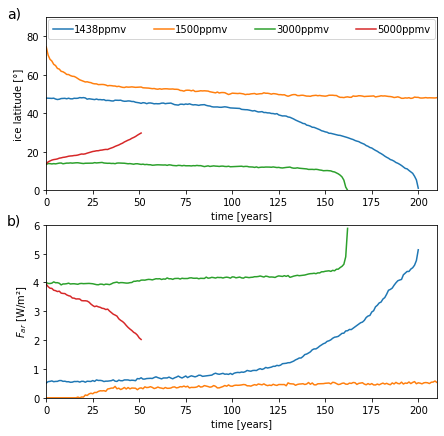

In [17]:

    
    
    
fig1, (ax1, ax2) = plt.subplots(2, 1, sharex=False,figsize=(7,7))
ax1.plot(yice_lat1)
ax1.plot(yice_lat4)
ax1.plot(yice_lat2)
ax1.plot(yice_lat3)

ax1.set_ylim(0,90)
ax1.set_xlim(0,210)
ax1.set_xlabel("time [years]")
ax1.set_ylabel("ice latitude [°]")
ax1.legend(["1438ppmv","1500ppmv","3000ppmv","5000ppmv"],loc = 2, 
               ncol=4, labelspacing=0.2,columnspacing=2,handletextpad=0.1,  handlelength=2, mode="expand",
           borderpad=0.5,borderaxespad=0.2)
ax1.text(-0.1,1,"a)", transform=ax1.transAxes, fontsize=14)
#plt.title("hice_5m: global sea ice border ")


ax2.plot(ymenergy1)
ax2.plot(ymenergy4)
ax2.plot(ymenergy2)
ax2.plot(ymenergy3)

ax2.set_xlabel("time [years]")
ax2.set_ylabel("$F_{ar}$ [W/m²]")
ax2.set_ylim(0,6)
ax2.set_xlim(0,210)
ax2.text(-0.1,1,"b)", transform=ax2.transAxes, fontsize=14)
plt.savefig("plots/hice5m_sic_qbot.svg",dpi=500)
plt.show()